In [16]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the dataset
# data = pd.read_csv("music-tours.csv")

# # Kegiatan 1 - EDA
# # 1. Menampilkan metadata dataset secara lengkap
# print(data.info())  # Shows column types, non-null count, etc.
# print(data.describe())  # Basic statistical summary

# # 2. Data cleaning dan data manipulation
# # Clean the 'Year(s)' column by extracting the start year
# data['Year(s)'] = data['Year(s)'].apply(lambda x: str(x).split('–')[0] if isinstance(x, str) else x)

# # Clean and convert the gross values to numeric
# # Remove any non-numeric characters (like [b] or commas), then convert to float
# data['Actual gross'] = data['Actual gross'].replace({'\\$': '', ',': '', '\\[.*\\]': ''}, regex=True).astype(float)
# data['Adjusted gross (in 2022 dollars)'] = data['Adjusted gross (in 2022 dollars)'].replace({'\\$': '', ',': '', '\\[.*\\]': ''}, regex=True).astype(float)

# # Handling missing values (if any)
# data = data.dropna(subset=['Actual gross', 'Adjusted gross (in 2022 dollars)'])

# # 3. Menganalisis business problem/question
# # a. Top grossing tours
# top_grossing_tours = data[['Artist', 'Actual gross']].sort_values(by='Actual gross', ascending=False).head(10)

# # b. Correlation between shows and gross
# correlation = data[['Shows', 'Actual gross']].corr()

# # c. Compare total gross across different artists
# gross_by_artist = data.groupby('Artist')['Actual gross'].sum().sort_values(ascending=False)

# # d. Average gross per show
# data['Average gross'] = data['Actual gross'] / data['Shows']

# # e. Trends in gross over time
# gross_by_year = data.groupby('Year(s)')['Actual gross'].sum()

# # 4. Descriptive statistics and outlier detection
# # Using IQR method to detect outliers in 'Actual gross'
# Q1 = data['Actual gross'].quantile(0.25)
# Q3 = data['Actual gross'].quantile(0.75)
# IQR = Q3 - Q1
# outliers = data[(data['Actual gross'] < (Q1 - 1.5 * IQR)) | (data['Actual gross'] > (Q3 + 1.5 * IQR))]

# # Kegiatan 2 - Visualisasi
# # 1. Comparison of total gross for each artist
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Actual gross', y='Artist', data=gross_by_artist.reset_index())
# plt.title('Total Gross by Artist')
# plt.xlabel('Total Gross in Dollars')
# plt.ylabel('Artist')
# plt.show()

# # 2. Scatter plot: Shows vs Total gross
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Shows', y='Actual gross', data=data)
# plt.title('Shows vs Total Gross')
# plt.xlabel('Number of Shows')
# plt.ylabel('Total Gross in Dollars')
# plt.show()

# # 3. Distribution plot for adjusted gross over the years
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Adjusted gross (in 2022 dollars)'], bins=20, kde=True)
# plt.title('Distribution of Adjusted Gross in 2022 Dollars')
# plt.xlabel('Adjusted Gross in 2022 Dollars')
# plt.ylabel('Frequency')
# plt.show()


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("music-tours.csv")

# Display the first few rows of the dataset to check the data
data.head()


,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023-2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008-2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018-2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [18]:
# 1. Menampilkan metadata dataset secara lengkap
print(data.info())  # Shows column types, non-null count, etc.
print(data.describe())  # Basic statistical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB
None
       Rank  Shows
count 20.00  20.0

In [ ]:
# 2. Data cleaning and manipulation
# Clean the 'Year(s)' column by extracting the start year
data['Year(s)'] = data['Year(s)'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)

# Clean and convert the gross values to numeric
# Remove any non-numeric characters (like [b] or commas), then convert to float
data['Actual gross'] = data['Actual gross'].replace({'\\$': '', ',': '', '\\[.*\\]': ''}, regex=True).astype(float)
data['Adjusted gross (in 2022 dollars)'] = data['Adjusted gross (in 2022 dollars)'].replace({'\\$': '', ',': '', '\\[.*\\]': ''}, regex=True).astype(float)

# Handling missing values (if any)
data = data.dropna(subset=['Actual gross', 'Adjusted gross (in 2022 dollars)'])

# Clean the 'Peak' and 'All Time Peak' columns by removing any non-numeric characters
data['Peak'] = data['Peak'].replace({'\\[.*?\\]': '', '†': '', ',': ''}, regex=True).astype(float)
data['All Time Peak'] = data['All Time Peak'].replace({'\\[.*?\\]': '', '†': '', ',': ''}, regex=True).astype(float)

# Fill missing values in 'Peak' and 'All Time Peak' with a placeholder (e.g., NaN)
data['Peak'] = data['Peak'].fillna(np.nan)
data['All Time Peak'] = data['All Time Peak'].fillna(np.nan)

# Remove special characters like ‡[21][a]* from the 'Tour title' column
data['Tour title'] = data['Tour title'].replace(r'\[.*?\]|\‡|\*|\†', '', regex=True)

# Display the cleaned data
data.head()


,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1.00,2.00,"780,000,000.00","780,000,000.00",Taylor Swift,The Eras Tour,2023,56,"$13,928,571",[1]
1,2,1.00,7.00,"579,800,000.00","579,800,000.00",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1.00,2.00,"411,000,000.00","560,622,615.00",Madonna,Sticky & Sweet Tour,2008,85,"$4,835,294",[6]
3,4,2.00,10.00,"397,300,000.00","454,751,555.00",Pink,Beautiful Trauma World Tour,2018,156,"$2,546,795",[7]
4,5,2.00,NaN,"345,675,146.00","402,844,849.00",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [32]:
# 3. Menganalisis business problem/question
# Set pandas to display numbers in a readable format
pd.set_option('display.float_format', '{:,.2f}'.format)
# a. Top grossing tours
top_grossing_tours = data[['Artist', 'Tour title', 'Actual gross']].sort_values(by='Actual gross', ascending=False).head(10)

top_grossing_tours


,Artist,Tour title,Actual gross
0,Taylor Swift,The Eras Tour,"780,000,000.00"
1,Beyoncé,Renaissance World Tour,"579,800,000.00"
2,Madonna,Sticky & Sweet Tour,"411,000,000.00"
3,Pink,Beautiful Trauma World Tour,"397,300,000.00"
4,Taylor Swift,Reputation Stadium Tour,"345,675,146.00"
5,Madonna,The MDNA Tour,"305,158,363.00"
6,Celine Dion,Taking Chances World Tour,"280,000,000.00"
7,Pink,Summer Carnival,"257,600,000.00"
8,Beyoncé,The Formation World Tour,"256,084,556.00"
9,Taylor Swift,The 1989 World Tour,"250,400,000.00"


In [21]:
# b. Correlation between shows and gross
correlation = data[['Shows', 'Actual gross']].corr()
correlation

,Shows,Actual gross
Shows,1.00,-0.31
Actual gross,-0.31,1.00


In [22]:
# c. Compare total gross across different artists
gross_by_artist = data.groupby('Artist')['Actual gross'].sum().sort_values(ascending=False)
gross_by_artist

Artist
Taylor Swift   1,526,075,146.00
Madonna        1,079,958,363.00
Beyoncé        1,064,984,556.00
Pink             838,900,000.00
Lady Gaga        397,400,000.00
Celine Dion      280,000,000.00
Katy Perry       204,000,000.00
Cher             200,000,000.00
Adele            167,700,000.00
Name: Actual gross, dtype: float64

In [23]:
# d. Average gross per show
data['Average gross'] = data['Actual gross'] / data['Shows']
data[['Artist','Tour title', 'Average gross']]

,Artist,Tour title,Average gross
0,Taylor Swift,The Eras Tour,"13,928,571.43"
1,Beyoncé,Renaissance World Tour,"10,353,571.43"
2,Madonna,Sticky & Sweet Tour,"4,835,294.12"
3,Pink,Beautiful Trauma World Tour,"2,546,794.87"
4,Taylor Swift,Reputation Stadium Tour,"6,522,172.57"
5,Madonna,The MDNA Tour,"3,467,708.67"
6,Celine Dion,Taking Chances World Tour,"2,137,404.58"
7,Pink,Summer Carnival,"6,282,926.83"
8,Beyoncé,The Formation World Tour,"5,226,215.43"
9,Taylor Swift,The 1989 World Tour,"2,945,882.35"


In [34]:
# e. Trends in gross over time
gross_by_year = data.groupby('Year(s)')['Actual gross'].sum()
gross_by_year

Year(s)
2002     200,000,000.00
2006     194,000,000.00
2008     691,000,000.00
2009     227,400,000.00
2012     475,158,363.00
2013     563,100,000.00
2014     204,000,000.00
2015     420,200,000.00
2016     423,784,556.00
2018     742,975,146.00
2023   1,617,400,000.00
Name: Actual gross, dtype: float64

In [36]:
# g. Identify top artists with the highest average gross per show
top_avg_gross_artists = data.groupby('Artist')['Average gross'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Artists by Average Gross per Show:")
print(top_avg_gross_artists)


Top 10 Artists by Average Gross per Show:
Artist
Taylor Swift   6,285,203.10
Beyoncé        5,771,797.64
Madonna        3,401,766.96
Pink           3,375,165.45
Celine Dion    2,137,404.58
Lady Gaga      1,427,445.46
Adele          1,385,950.41
Katy Perry     1,350,993.38
Cher             615,384.62
Name: Average gross, dtype: float64


In [37]:
# h. Identify tours with highest and lowest gross per show (show efficiency)
highest_gross_per_show = data[['Artist', 'Tour title', 'Average gross']].sort_values(by='Average gross', ascending=False).head(10)
lowest_gross_per_show = data[['Artist', 'Tour title', 'Average gross']].sort_values(by='Average gross').head(10)
print("\nTop 10 Tours with Highest Gross per Show:")
print(highest_gross_per_show)
print("\nTop 10 Tours with Lowest Gross per Show:")
print(lowest_gross_per_show)


Top 10 Tours with Highest Gross per Show:
          Artist                   Tour title  Average gross
0   Taylor Swift               The Eras Tour   13,928,571.43
1        Beyoncé       Renaissance World Tour  10,353,571.43
4   Taylor Swift      Reputation Stadium Tour   6,522,172.57
7           Pink             Summer Carnival    6,282,926.83
8        Beyoncé     The Formation World Tour   5,226,215.43
2        Madonna         Sticky & Sweet Tour    4,835,294.12
5        Madonna                The MDNA Tour   3,467,708.67
14       Madonna             Confessions Tour   3,233,333.33
9   Taylor Swift          The 1989 World Tour   2,945,882.35
3           Pink  Beautiful Trauma World Tour   2,546,794.87

Top 10 Tours with Lowest Gross per Show:
          Artist                        Tour title  Average gross
13          Cher  Living Proof: The Farewell Tour      615,384.62
11     Lady Gaga            The Monster Ball Tour    1,120,197.04
15          Pink         The Truth About Love 

In [25]:
# 4. Descriptive statistics and outlier detection
# Using IQR method to detect outliers in 'Actual gross'
Q1 = data['Actual gross'].quantile(0.25)
Q3 = data['Actual gross'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Actual gross'] < (Q1 - 1.5 * IQR)) | (data['Actual gross'] > (Q3 + 1.5 * IQR))]

# Display outliers
outliers


,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1.00,2.00,"780,000,000.00","780,000,000.00",Taylor Swift,The Eras Tour,2023,56,"13,928,571.43",[1]
1,2,1.00,7.00,"579,800,000.00","579,800,000.00",Beyoncé,Renaissance World Tour,2023,56,"10,353,571.43",[3]


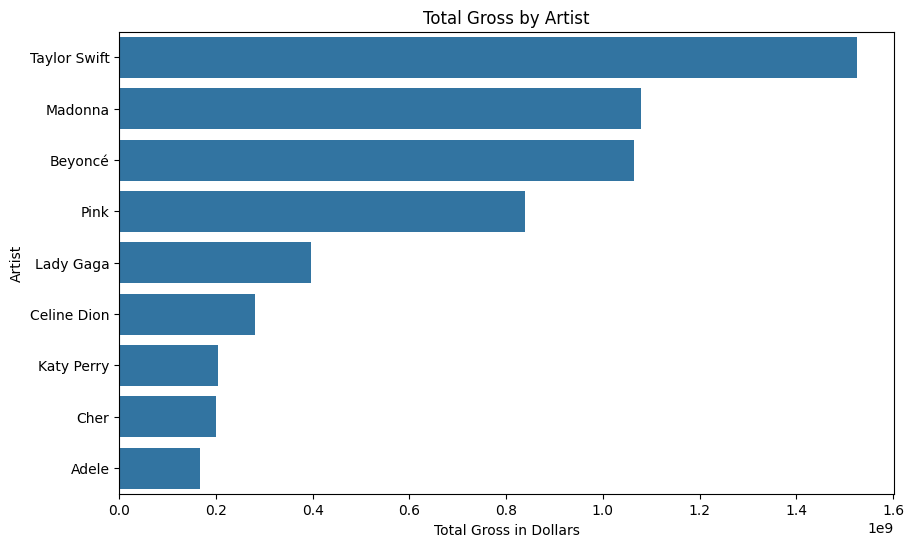

In [26]:
# 1. Comparison of total gross for each artist
plt.figure(figsize=(10, 6))
sns.barplot(x='Actual gross', y='Artist', data=gross_by_artist.reset_index())
plt.title('Total Gross by Artist')
plt.xlabel('Total Gross in Dollars')
plt.ylabel('Artist')
plt.show()


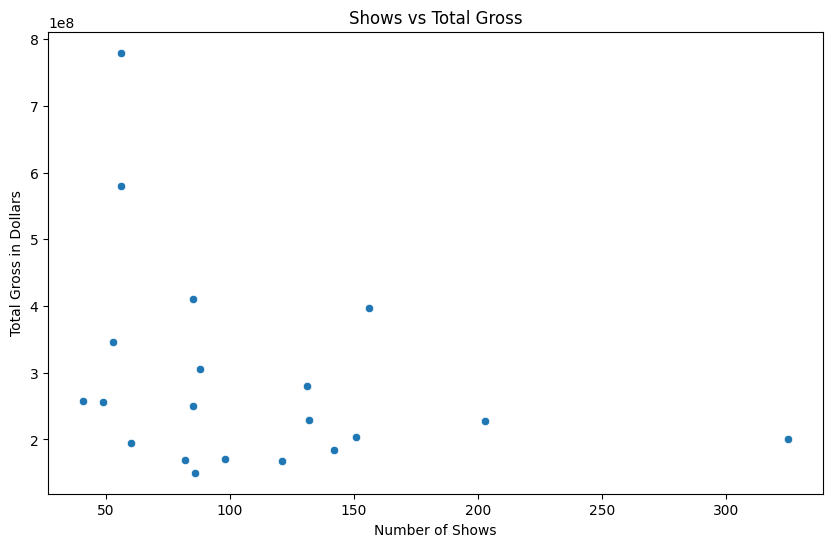

In [27]:
# 2. Scatter plot: Shows vs Total gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shows', y='Actual gross', data=data)
plt.title('Shows vs Total Gross')
plt.xlabel('Number of Shows')
plt.ylabel('Total Gross in Dollars')
plt.show()


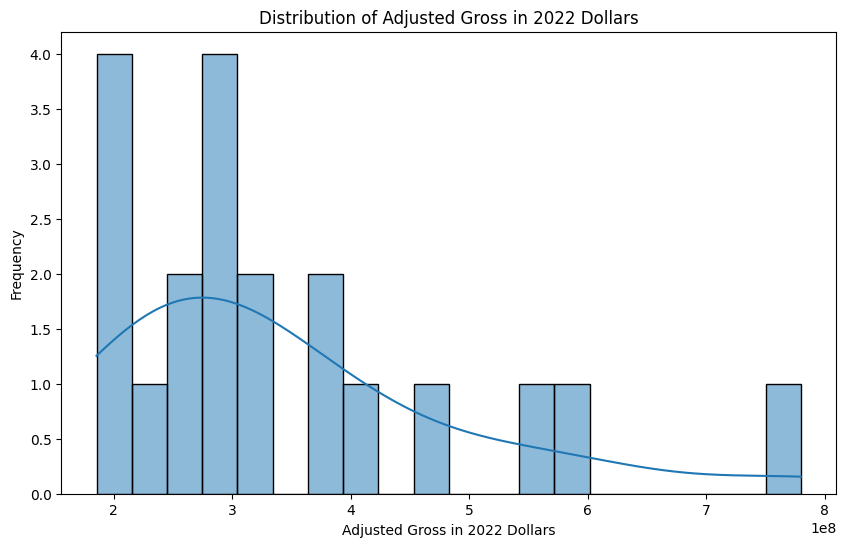

In [28]:
# 3. Distribution plot for adjusted gross over the years
plt.figure(figsize=(10, 6))
sns.histplot(data['Adjusted gross (in 2022 dollars)'], bins=20, kde=True)
plt.title('Distribution of Adjusted Gross in 2022 Dollars')
plt.xlabel('Adjusted Gross in 2022 Dollars')
plt.ylabel('Frequency')
plt.show()


In [29]:
# Extract cleaned data into a new CSV file
data.to_csv('cleaned_music_tours.csv', index=False, na_rep='NaN')

# Optionally, you can check the first few rows of the cleaned data
data.head()


,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1.00,2.00,"780,000,000.00","780,000,000.00",Taylor Swift,The Eras Tour,2023,56,"13,928,571.43",[1]
1,2,1.00,7.00,"579,800,000.00","579,800,000.00",Beyoncé,Renaissance World Tour,2023,56,"10,353,571.43",[3]
2,3,1.00,2.00,"411,000,000.00","560,622,615.00",Madonna,Sticky & Sweet Tour,2008,85,"4,835,294.12",[6]
3,4,2.00,10.00,"397,300,000.00","454,751,555.00",Pink,Beautiful Trauma World Tour,2018,156,"2,546,794.87",[7]
4,5,2.00,NaN,"345,675,146.00","402,844,849.00",Taylor Swift,Reputation Stadium Tour,2018,53,"6,522,172.57",[8]
